In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = 'D:/abnormal_detection_dataset/data_3000/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

X = []
Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
    X.append(img_read(src,file)/255.)
    Y.append(1) # nomal label : 1

# array로 데이터 변환
X = np.array(X)
Y = np.array(Y)

print('Normal shape:',np.shape(X))

Normal shape: (3000, 56, 56)


In [2]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set, Test set으로 나누기 
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(np.shape(X_train))
print(np.shape(X_test))

(2400, 3136)
(600, 3136)


In [3]:
# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = 'D:/abnormal_detection_dataset/data_1000/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

ANom = []
ANom_Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
    ANom.append(img_read(src,file)/255.)
    ANom_Y.append(0) # Anomal label : 0

# array로 데이터 변환
ANom = np.array(ANom)
ANom_Y = np.array(ANom_Y)
print('Anomaly shape:', np.shape(ANom_Y))

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
ANom_images = ANom.reshape((len(ANom), np.prod(ANom.shape[1:])))
print(np.shape(ANom_images))

Anomaly shape: (1000,)
(1000, 3136)


In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [5]:
print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

2.10.1
2.10.0


### Autoencoder model

In [6]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(56*56,)))  # 입력계층
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # 은닉계층
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(128))                        # 은닉계층
    model.add(Activation('relu'))

    model.add(Dense(56*56))                # 출력계층
    model.add(Activation('linear'))

    return model

In [7]:
# model 함수 실행
model = AE()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               803072    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3136)              4

In [10]:
# 위에서 정한 모델을 그림으로(plot) 보여줌
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Training

In [11]:
# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

Epoch 1/20
10/10 [==============================] - 2s 43ms/step - loss: 0.2806 - mae: 0.4119 - val_loss: 0.1199 - val_mae: 0.2745
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1103 - mae: 0.2584 - val_loss: 0.1023 - val_mae: 0.2451
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0983 - mae: 0.2423 - val_loss: 0.0939 - val_mae: 0.2365
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0894 - mae: 0.2303 - val_loss: 0.0824 - val_mae: 0.2199
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0762 - mae: 0.2084 - val_loss: 0.0693 - val_mae: 0.1948
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0656 - mae: 0.1872 - val_loss: 0.0636 - val_mae: 0.1901
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0604 - mae: 0.1776 - val_loss: 0.0581 - val_mae: 0.1734
Epoch 8/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0556 - mae: 0.1

### Normal data 복원 확인 (data_3000 중 20%의 test data)

Normal Test data cost =  0.0302
19/19 [==============================] - 0s 2ms/step


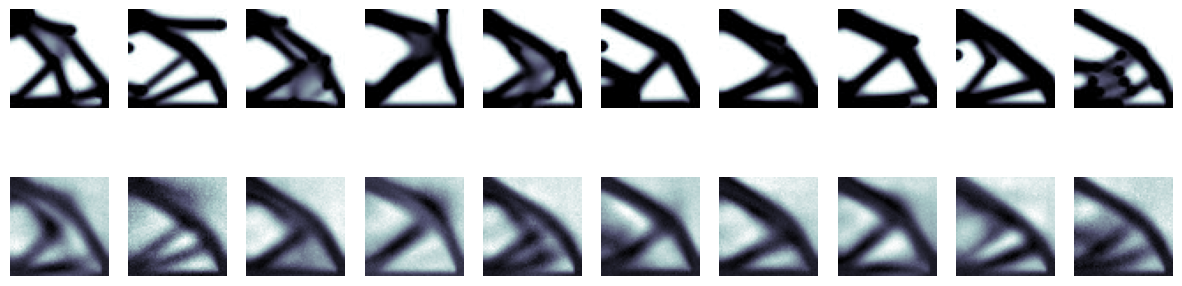

In [12]:
test_score = model.evaluate(X_test, X_test, verbose=0) # loss 값 결과 확인
print('Normal Test data cost = ', '{:.4f}'.format(test_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction1 = model.predict(X_test)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img1 = X_test[i].reshape(56,56)
  rec_img1 = prediction1[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img1, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img1, cmap=plt.cm.bone)

plt.show()

### Abnormal data 복원 확인 (data_1000)

Abnormal Testing data cost =  0.0699
32/32 [==============================] - 0s 2ms/step


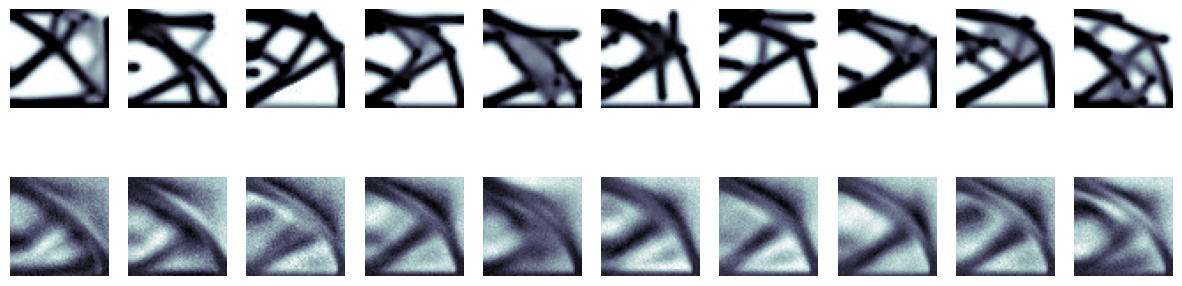

In [13]:
ANom_score = model.evaluate(ANom_images, ANom_images, verbose=0) # loss 값 결과 확인
print('Abnormal Testing data cost = ', '{:.4f}'.format(ANom_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction2 = model.predict(ANom_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img2 = ANom_images[i].reshape(56,56)
  rec_img2 = prediction2[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img2, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img2, cmap=plt.cm.bone)

plt.show()

### ※ Confusion Matrix(오차행렬)

### Test_data & data_1000 예측값(y_pred) 구하기 (AE 통과하기)
#### 1. data_3000과 data_1000의 이미지 별 loss(MSE) 구하기
#### 2. 둘을 비교하여 (히스토그램) 임계값 설정

94/94 [==============================] - 0s 3ms/step
Normal Metric
        Normal_mse
count  3000.000000
mean      0.030133
std       0.009325
min       0.008905
25%       0.023089
50%       0.029447
75%       0.036412
max       0.068119


32/32 [==============================] - 0s 2ms/step
Anomaly Metric
       Anomaly_mse
count  1000.000000
mean      0.069928
std       0.017210
min       0.029405
25%       0.057778
50%       0.068273
75%       0.079937
max       0.136802




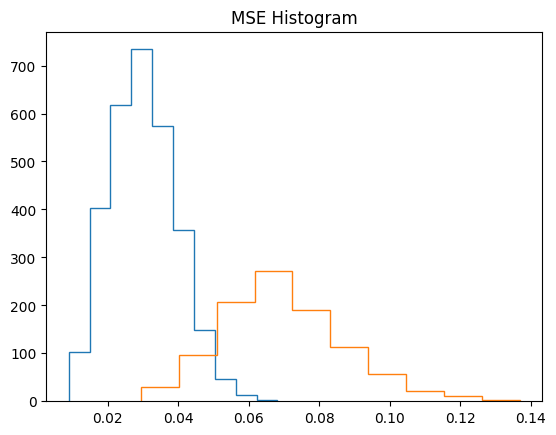

In [14]:
import pandas as pd # pandas 라이브러리

# Normal data (data_3000)
Nom_data = np.concatenate((X_test, X_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(ANom_images) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(ANom_images - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()